#### Missing data basics
When / why does data become missing?
Some might quibble over our usage of missing. By “missing” we simply mean NA (“not available”) or “not present for whatever reason”. Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. For example, in a collection of financial time series, some of the time series might start on different dates. Thus, values prior to the start date would generally be marked as missing.

In pandas, one of the most common ways that missing data is introduced into a data set is by reindexing. For example

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import scipy as sci
#conda install pandas


In [32]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],
                    columns=['one', 'two', 'three'])
  

df['four'] = 'bar'

df['five'] = df['one'] > 0

df

,one,two,three,four,five
a,0.640471,0.574985,1.119750,bar,True
c,-0.201470,0.715162,-1.237087,bar,False
e,-1.002467,0.720231,-2.100240,bar,False
f,0.571733,0.578559,1.946448,bar,True
h,-0.407900,-0.614597,0.302927,bar,False


In [33]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

df2

,one,two,three,four,five
a,0.640471,0.574985,1.119750,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-0.201470,0.715162,-1.237087,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-1.002467,0.720231,-2.100240,bar,False
f,0.571733,0.578559,1.946448,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.407900,-0.614597,0.302927,bar,False


To make detecting missing values easier (and across different array dtypes), pandas provides the isna() and notna() functions, which are also methods on Series and DataFrame objects:

In [40]:
#pd.options.mode.use_inf_as_na = True

df2.isnull().sum()

one      3
two      3
three    3
four     3
five     3
dtype: int64

In [ ]:
#### Imputation with scikit-learn

In [4]:
from pandas import read_csv
from sklearn.preprocessing import Imputer
import numpy
#dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
#dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)
# fill missing values with mean column values
d=df2.iloc[:,0:3]
values = d.values
imputer = Imputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(numpy.isnan(transformed_values).sum())

0


In [206]:
transformed_values

array([[-0.33801778,  0.35913333,  0.62222041],
       [-0.04664987, -0.14035283,  0.37977703],
       [ 0.96078194,  0.75837035, -1.13431848],
       [-0.04664987, -0.14035283,  0.37977703],
       [-0.70742089, -1.22142917,  1.80447664],
       [ 0.18040981,  0.55316427,  1.03302907],
       [-0.04664987, -0.14035283,  0.37977703],
       [-0.32900243, -1.15100294, -0.42652247]])

In [41]:
df2['four'].notnull()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [44]:
s = pd.Series([2,3,np.nan,7,"A"])
s.isnull()

0    False
1    False
2     True
3    False
4    False
dtype: bool

#### Determine if ANY Value in a Series is Missing
While the isnull() method is useful, sometimes we may wish to evaluate whether any value is missing in a Series.

In [46]:
s.isnull().values.any()

True

In [5]:
df2 = df.copy()

df2['timestamp'] = pd.Timestamp('20120101')

df2

,one,two,three,four,five,timestamp
a,0.712773,0.868651,0.469588,bar,True,2012-01-01
c,0.788490,-0.146418,0.458813,bar,True,2012-01-01
e,1.764626,0.998731,-0.604535,bar,True,2012-01-01
f,-0.786302,0.555929,1.327776,bar,False,2012-01-01
h,-1.798627,1.480254,1.297654,bar,False,2012-01-01


In [35]:
pd.isnull(df)

,one,two,three,four,five
a,False,False,False,False,False
c,False,False,False,False,False
e,False,False,False,False,False
f,False,False,False,False,False
h,False,False,False,False,False


#### Inserting missing data
You can insert missing values by simply assigning to containers. The actual missing value used will be chosen based on the dtype.

For example, numeric containers will always use NaN regardless of the missing value type chosen:

In [16]:
df = pd.DataFrame(np.random.randn(10,6))
# Make a few areas have NaN values
df.iloc[1:3,1] = np.nan
df.iloc[5,3] = np.nan
df.iloc[7:9,5] = np.nan
df.iloc[9,:] = np.nan
#df.columns = ['Zero', 'One', 'Two','Three','Four','Five']
df

,0,1,2,3,4,5
0,-0.049305,0.151916,0.254184,1.462502,-0.920482,-0.880707
1,0.782699,NaN,0.119486,-1.033349,0.313973,0.904393
2,-0.171534,NaN,0.233540,0.039106,-1.951969,0.409110
3,0.006990,0.787030,-0.730570,-0.752336,0.239562,-0.158354
4,0.948914,-0.701089,0.391831,-0.058490,-0.814264,-1.072539
5,-0.994749,-1.421530,-0.085495,NaN,-1.375204,-0.374679
6,0.587274,-0.372154,1.499404,-0.189578,-1.958171,-0.631299
7,0.416601,-2.952760,0.716026,0.638955,-1.546207,NaN
8,0.211020,0.787539,1.131726,0.508454,0.072155,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dff=df.copy()
dff.columns = ['Zero', 'One', 'Two','Three','Four','Five']
dff


,Zero,One,Two,Three,Four,Five
0,-0.049305,0.151916,0.254184,1.462502,-0.920482,-0.880707
1,0.782699,NaN,0.119486,-1.033349,0.313973,0.904393
2,-0.171534,NaN,0.233540,0.039106,-1.951969,0.409110
3,0.006990,0.787030,-0.730570,-0.752336,0.239562,-0.158354
4,0.948914,-0.701089,0.391831,-0.058490,-0.814264,-1.072539
5,-0.994749,-1.421530,-0.085495,NaN,-1.375204,-0.374679
6,0.587274,-0.372154,1.499404,-0.189578,-1.958171,-0.631299
7,0.416601,-2.952760,0.716026,0.638955,-1.546207,NaN
8,0.211020,0.787539,1.131726,0.508454,0.072155,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


#### NA values in GroupBy

NA groups in GroupBy are automatically excluded. This behavior is consistent with R, for example:

In [56]:
df.iloc[:,1].mean()

0.7657158581201874

In [20]:
dff.groupby('One').mean()

,Zero,Two,Three,Four,Five
One,,,,,
-2.952760,0.416601,0.716026,0.638955,-1.546207,NaN
-1.421530,-0.994749,-0.085495,NaN,-1.375204,-0.374679
-0.701089,0.948914,0.391831,-0.058490,-0.814264,-1.072539
-0.372154,0.587274,1.499404,-0.189578,-1.958171,-0.631299
0.151916,-0.049305,0.254184,1.462502,-0.920482,-0.880707
0.787030,0.006990,-0.730570,-0.752336,0.239562,-0.158354
0.787539,0.211020,1.131726,0.508454,0.072155,NaN


#### Cleaning / filling missing data
pandas objects are equipped with various data manipulation methods for dealing with missing data.

Filling missing values: fillna

The fillna function can “fill in” NA values with non-NA data in a couple of ways, which we illustrate:

Replace NA with a scalar value

In [21]:
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.712773,0.868651,0.469588,bar,True,2012-01-01
c,0.788490,-0.146418,0.458813,bar,True,2012-01-01
e,1.764626,0.998731,-0.604535,bar,True,2012-01-01
f,-0.786302,0.555929,1.327776,bar,False,2012-01-01
h,-1.798627,1.480254,1.297654,bar,False,2012-01-01


In [64]:
df2['four'].fillna('missing')

a        bar
b    missing
c        bar
d    missing
e        bar
f        bar
g    missing
h        bar
Name: four, dtype: object

#### Fill gaps forward or backward

Using the same filling arguments as reindexing, we can propagate non-NA values forward or backward:

In [71]:
df2.fillna(method='pad')

,one,two,three,four,five
a,-0.664354,2.135503,1.662133,bar,False
b,-0.664354,2.135503,1.662133,bar,False
c,-0.588356,-0.231993,-0.183790,bar,False
d,-0.588356,-0.231993,-0.183790,bar,False
e,-0.307532,-1.714443,-0.502726,bar,False
f,0.918708,-0.046874,1.459175,bar,True
g,0.918708,-0.046874,1.459175,bar,True
h,-0.479040,0.882918,-0.410178,bar,False


#### Limit the amount of filling

If we only want consecutive gaps filled up to a certain number of data points, we can use the limit keyword:

In [24]:
df2.fillna(method='pad', limit=1)

,one,two,three,four,five,timestamp
a,0.712773,0.868651,0.469588,bar,True,2012-01-01
c,0.788490,-0.146418,0.458813,bar,True,2012-01-01
e,1.764626,0.998731,-0.604535,bar,True,2012-01-01
f,-0.786302,0.555929,1.327776,bar,False,2012-01-01
h,-1.798627,1.480254,1.297654,bar,False,2012-01-01


In [25]:
df2.fillna(df2.mean())

,one,two,three,four,five,timestamp
a,0.712773,0.868651,0.469588,bar,True,2012-01-01
c,0.788490,-0.146418,0.458813,bar,True,2012-01-01
e,1.764626,0.998731,-0.604535,bar,True,2012-01-01
f,-0.786302,0.555929,1.327776,bar,False,2012-01-01
h,-1.798627,1.480254,1.297654,bar,False,2012-01-01


#### Filling with a PandasObject

You can also fillna using a dict or Series that is alignable. The labels of the dict or index of the Series must match the columns of the frame you wish to fill. The use case of this is to fill a DataFrame with the mean of that column.

In [78]:
df2.fillna(df2.mean()['one':'three'])

,one,two,three,four,five
a,-0.664354,2.135503,1.662133,bar,False
b,-0.224115,0.205022,0.404923,NaN,NaN
c,-0.588356,-0.231993,-0.183790,bar,False
d,-0.224115,0.205022,0.404923,NaN,NaN
e,-0.307532,-1.714443,-0.502726,bar,False
f,0.918708,-0.046874,1.459175,bar,True
g,-0.224115,0.205022,0.404923,NaN,NaN
h,-0.479040,0.882918,-0.410178,bar,False


In [30]:
df2.where(pd.notnull(df2), df2.mean(), axis='columns')

,one,two,three,four,five,timestamp
a,0.712773,0.868651,0.469588,bar,True,2012-01-01
c,0.788490,-0.146418,0.458813,bar,True,2012-01-01
e,1.764626,0.998731,-0.604535,bar,True,2012-01-01
f,-0.786302,0.555929,1.327776,bar,False,2012-01-01
h,-1.798627,1.480254,1.297654,bar,False,2012-01-01


#### Dropping axis labels with missing data: dropna

You may wish to simply exclude labels from a data set which refer to missing data. To do this, use the dropna method:

In [88]:
#drop all rows with missing values
df2.dropna(axis=0)

,one,two,three,four,five
a,-0.664354,2.135503,1.662133,bar,False
c,-0.588356,-0.231993,-0.183790,bar,False
e,-0.307532,-1.714443,-0.502726,bar,False
f,0.918708,-0.046874,1.459175,bar,True
h,-0.479040,0.882918,-0.410178,bar,False


In [90]:
#drop all columns with missing values
df2.dropna(axis=1)

""
a
b
c
d
e
f
g
h


In [85]:
df2['one'].dropna()

a   -0.664354
c   -0.588356
e   -0.307532
f    0.918708
h   -0.479040
Name: one, dtype: float64

#### Interpolation

New in version 0.17.0: The limit_direction keyword argument was added.

Both Series and DataFrame objects have an interpolate method that, by default, performs linear interpolation at missing datapoints

In [29]:
# In python
#df2.dropna(inplace=True)
df2

,one,two,three,four,five,timestamp
a,0.712773,0.868651,0.469588,bar,True,2012-01-01
c,0.788490,-0.146418,0.458813,bar,True,2012-01-01
e,1.764626,0.998731,-0.604535,bar,True,2012-01-01
f,-0.786302,0.555929,1.327776,bar,False,2012-01-01
h,-1.798627,1.480254,1.297654,bar,False,2012-01-01


In [92]:
df2['one'].count()


5

In [93]:
df2['one'].interpolate().count()


8

In [95]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
rng[:5]

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [96]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts.head()

2011-01-01 00:00:00   -1.443133
2011-01-01 01:00:00   -1.738260
2011-01-01 02:00:00   -0.465109
2011-01-01 03:00:00    0.303754
2011-01-01 04:00:00    0.146848
Freq: H, dtype: float64

In [101]:
ts[[1,4,7,30,15,40]]=np.nan

In [103]:
ts[:10]

2011-01-01 00:00:00   -1.443133
2011-01-01 01:00:00         NaN
2011-01-01 02:00:00   -0.465109
2011-01-01 03:00:00    0.303754
2011-01-01 04:00:00         NaN
2011-01-01 05:00:00    0.238217
2011-01-01 06:00:00   -0.020499
2011-01-01 07:00:00         NaN
2011-01-01 08:00:00    0.774793
2011-01-01 09:00:00    0.394781
Freq: H, dtype: float64

In [104]:
ts.count()

66

In [105]:
ts.interpolate().count()

72

In [136]:
x=ts.interpolate().index
y=ts.interpolate()


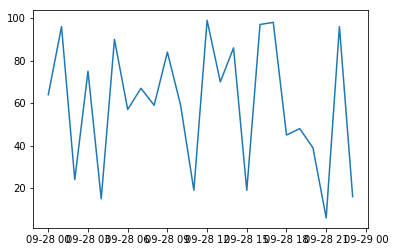

In [124]:
x = np.array([datetime.datetime(2013, 9, 28, i, 0) for i in range(24)])
y = np.random.randint(100, size=x.shape)

plt.plot(x,y)
plt.show()

In [146]:
td=pd.DataFrame({'X':x,'Y':y})
#td.columns=['x','y']
#td.rename=['x','y']
td.iloc[0:5,:]

,X,Y
2011-01-01 00:00:00,2011-01-01 00:00:00,-1.443133
2011-01-01 01:00:00,2011-01-01 01:00:00,-0.954121
2011-01-01 02:00:00,2011-01-01 02:00:00,-0.465109
2011-01-01 03:00:00,2011-01-01 03:00:00,0.303754
2011-01-01 04:00:00,2011-01-01 04:00:00,0.270986


In [139]:
#td.columns = ['title','author']

In [143]:
td.interpolate(method='time').head(5)

,0
-1.443133,2011-01-01 00:00:00
-0.954121,2011-01-01 01:00:00
-0.465109,2011-01-01 02:00:00
0.303754,2011-01-01 03:00:00
0.270986,2011-01-01 04:00:00


In [147]:
df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                 'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [148]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


The method argument gives access to fancier interpolation methods. If you have scipy installed, you can set pass the name of a 1-d interpolation routine to method. You’ll want to consult the full scipy interpolation documentation and reference guide for details. The appropriate interpolation method will depend on the type of data you are working with.

If you are dealing with a time series that is growing at an increasing rate, method='quadratic' may be appropriate.
If you have values approximating a cumulative distribution function, then method='pchip' should work well.
To fill missing values with goal of smooth plotting, use method='akima'

In [151]:
df.interpolate(method='barycentric')

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [152]:
df.interpolate(method='pchip')

,A,B
0,1.00000,0.250000
1,2.10000,0.672808
2,3.43454,1.928950
3,4.70000,4.000000
4,5.60000,12.200000
5,6.80000,14.400000


In [153]:
df.interpolate(method='akima')

,A,B
0,1.000000,0.250000
1,2.100000,-0.873316
2,3.406667,0.320034
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


When interpolating via a polynomial or spline approximation, you must also specify the degree or order of the approximation:

In [154]:
df.interpolate(method='spline', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [155]:

df.interpolate(method='polynomial', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-2.703846
2,3.451351,-1.453846
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


Compare several methods:

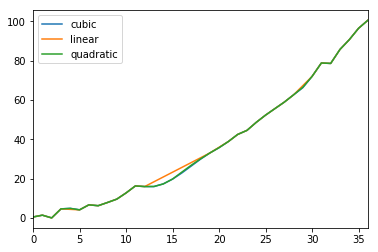

In [156]:
np.random.seed(2)

ser = pd.Series(np.arange(1, 10.1, .25)**2 + np.random.randn(37))

bad = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser[bad] = np.nan

methods = ['linear', 'quadratic', 'cubic']

df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

df.plot()

In [159]:
df.iloc[0:5,:]

,cubic,linear,quadratic
0,0.583242,0.583242,0.583242
1,1.506233,1.506233,1.506233
2,0.113804,0.113804,0.113804
3,4.702771,4.702771,4.702771
4,4.980575,4.461762,4.935212


In [160]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))

In [161]:
# interpolate at new_index
new_index = ser.index | pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75])

interp_s = ser.reindex(new_index).interpolate(method='pchip')

interp_s[49:51]

49.00    0.471410
49.25    0.476841
49.50    0.481780
49.75    0.485998
50.00    0.489266
50.25    0.491814
50.50    0.493995
50.75    0.495763
51.00    0.497074
dtype: float64

#### Interpolation Limits

Like other pandas fill methods, interpolate accepts a limit keyword argument. Use this argument to limit the number of consecutive interpolations, keeping NaN values for interpolations that are too far from the last valid observation:

In [162]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13])

ser.interpolate(limit=2)

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5     NaN
6    13.0
dtype: float64

By default, limit applies in a forward direction, so that only NaN values after a non-NaN value can be filled. If you provide 'backward' or 'both' for the limit_direction keyword argument, you can fill NaN values before non-NaN values, or both before and after non-NaN values, respectively:

In [163]:
ser.interpolate(limit=1)  # limit_direction == 'forward'

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
dtype: float64

In [164]:
ser.interpolate(limit=1, limit_direction='backward')

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
dtype: float64

In [165]:
ser.interpolate(limit=1, limit_direction='both')

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
dtype: float64

#### Replacing Generic Values

Often times we want to replace arbitrary values with other values. The replace method in Series/DataFrame provides an efficient yet flexible way to perform such replacements.

For a Series, you can replace a single value or a list of values by another value:

In [166]:
ser = pd.Series([0., 1., 2., 3., 4.])

ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

You can replace a list of values by a list of other values:

In [167]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

You can also specify a mapping dict:

In [168]:
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

For a DataFrame, you can specify individual values by column:

In [169]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})

df.replace({'a': 0, 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


Instead of replacing with specified values, you can treat all given values as missing and interpolate over them:

In [170]:
ser.replace([1, 2, 3], method='pad')

0    0.0
1    0.0
2    0.0
3    0.0
4    4.0
dtype: float64

#### String/Regular Expression Replacement¶

Note Python strings prefixed with the r character such as r'hello world' are so-called “raw” strings. They have different semantics regarding backslashes than strings without this prefix. Backslashes in raw strings will be interpreted as an escaped backslash, e.g., r'\' == '\\'. You should read about them if this is unclear

In [171]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}

df = pd.DataFrame(d)

df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


Now do it with a regular expression that removes surrounding whitespace (regex -> regex)

In [172]:
df.replace(r'\s*\.\s*', np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


Replace a few different values (list -> list)

In [173]:
df.replace(['a', '.'], ['b', np.nan])

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


list of regex -> list of regex

In [174]:
df.replace([r'\.', r'(a)'], ['dot', '\1stuff'], regex=True)

,a,b,c
0,0,stuff,stuff
1,1,b,b
2,2,dot,NaN
3,3,dot,d


Only search in column 'b' (dict -> dict)

In [176]:
df.replace({'b': '.'}, {'b': np.nan})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


Same as the previous example, but use a regular expression for searching instead (dict of regex -> dict)

In [177]:
df.replace({'b': r'\s*\.\s*'}, {'b': np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


You can pass nested dictionaries of regular expressions that use regex=True

In [178]:
df.replace({'b': {'b': r''}}, regex=True)

,a,b,c
0,0,a,a
1,1,,b
2,2,.,NaN
3,3,.,d


or you can pass the nested dictionary like so

In [179]:
df.replace(regex={'b': {r'\s*\.\s*': np.nan}})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


You can also use the group of a regular expression match when replacing (dict of regex -> dict of regex), this works for lists as well

In [180]:
df.replace({'b': r'\s*(\.)\s*'}, {'b': r'\1ty'}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,.ty,NaN
3,3,.ty,d


You can pass a list of regular expressions, of which those that match will be replaced with a scalar (list of regex -> regex)

In [181]:
df.replace([r'\s*\.\s*', r'a|b'], np.nan, regex=True)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


All of the regular expression examples can also be passed with the to_replace argument as the regex argument. In this case the value argument must be passed explicitly by name or regex must be a nested dictionary. The previous example, in this case, would then be

In [182]:
df.replace(regex=[r'\s*\.\s*', r'a|b'], value=np.nan)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


This can be convenient if you do not want to pass regex=True every time you want to use a regular expression.

Note Anywhere in the above replace examples that you see a regular expression a compiled regular expression is valid as well.
#### Numeric Replacement

Similar to DataFrame.fillna

In [183]:
df = pd.DataFrame(np.random.randn(10, 2))

df[np.random.rand(df.shape[0]) > 0.5] = 1.5

df.replace(1.5, np.nan)

,0,1
0,-0.844214,-1.021415
1,0.432396,-0.323580
2,0.423825,0.799180
3,1.262614,0.751965
4,NaN,NaN
5,NaN,NaN
6,-0.498174,-1.060799
7,0.591667,-0.183257
8,1.019855,-1.482465
9,NaN,NaN


Replacing more than one value via lists works as well

In [184]:
df00 = df.values[0, 0]

df.replace([1.5, df00], [np.nan, 'a'])

,0,1
0,a,-1.02141
1,0.432396,-0.32358
2,0.423825,0.79918
3,1.26261,0.751965
4,NaN,NaN
5,NaN,NaN
6,-0.498174,-1.0608
7,0.591667,-0.183257
8,1.01985,-1.48247
9,NaN,NaN


You can also operate on the DataFrame in place

In [185]:
df.replace(1.5, np.nan, inplace=True)

#### Missing data casting rules and indexing
While pandas supports storing arrays of integer and boolean type, these types are not capable of storing missing data. Until we can switch to using a native NA type in NumPy, we’ve established some “casting rules” when reindexing will cause missing data to be introduced into, say, a Series or DataFrame. Here they are:

In [188]:
s = pd.Series(np.random.randn(5), index=[0, 2, 4, 6, 7])




crit = (s > 0).reindex(list(range(8)))

crit

0    False
1      NaN
2    False
3      NaN
4     True
5      NaN
6     True
7     True
dtype: object

In [189]:
crit.dtype

dtype('O')

In [203]:
df2.iloc[:,0:3]

,one,two,three
a,-0.338018,0.359133,0.622220
b,NaN,NaN,NaN
c,0.960782,0.758370,-1.134318
d,NaN,NaN,NaN
e,-0.707421,-1.221429,1.804477
f,0.180410,0.553164,1.033029
g,NaN,NaN,NaN
h,-0.329002,-1.151003,-0.426522
